# Analisa untuk Zuber 

Zuber adalah perusahan berbagi pelanggan yang berdomisili di Chicago. Kegiatan analisa kali ini bertujuan untuk menemukan pola dari informasi yang tersedia serta memahami preferensi penumpang dan dampak faktor eksternal terhadap frekuensi perjalanan. Terdapat beberapa hipotesis pada kegiatan ini, yakni:
- durasi rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari - hari sabtu yang hujan

## Pra-pemrosesan 

### Pemanggilan library 

Pertama dilakukan pemanggilan library yang akan digunakan dalam analisa ini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

### Pemanggilan dataset

Selanjutnya dilakukan pemanggilan dataset yang menunjang kegiatan analisa ini

In [2]:
try:
    company = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
    loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
    
except:
    company = pd.read_csv('C:/Users/ASUS/project_sql_result_01.csv')
    dropoff = pd.read_csv('C:/Users/ASUS/project_sql_result_04.csv')
    loop_ohare = pd.read_csv('C:/Users/ASUS/project_sql_result_07.csv')

### Pengeksplorasian data awal

Terdapat 3 buah dataset, yakni `company`, `dropoff`, dan `loop_ohare`. Pada dataset `company`, terdapat 2 buah kolom yakni:
- `company_name`: nama perusahaan taksi
- `trips_amount`: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

Sedangkan untuk dataset `dropoff`, terdapat pula 2 buah kolom yakni: 
- `dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir
- `average_trips`: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

Terakhir untuk dataset `loop_ohare`, terdapat 3 buah kolom yakni:
- `start_ts`- tanggal dan waktu penjemputan
- `weather_conditions`- kondisi cuaca saat perjalanan dimulai
- `duration_seconds`- durasi perjalanan dalam satuan detik

In [3]:
#mengetahui ukuran dataset company dan dropoff
company.shape, dropoff.shape, loop_ohare.shape

((64, 2), (94, 2), (1068, 3))

pada dataset `company` terdapat 64 baris, untuk dataset `dropoff` terdapat 94 baris, dan untuk dataset `loop_ohare` terdapat 1068 baris

In [4]:
#Pemanggilan ringkasan umum dataset company
company.info()
company.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Dapat dilihat bahwa tidak ada nilai yang hilang pada dataset `company`. Selain itu rata - rata jumlah perjalanan untuk seluruh perusahaan taksi pada tanggal 16 - 17 November 2017 adalah 2145 perjalanan dengan jumlah perjalanan terkecil adalah 2 perjalanan dan jumlah perjalanan terbesar adalah 19558.

In [5]:
#Pemanggilan ringkasan umum dataset dropoff
dropoff.info()
dropoff.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Dapat dilihat bahwa tidak ada nilai yang hilang pada dataset `dropoff`. Selain itu rata - rata jumlah perjalanan untuk seluruh wilayah Chicago pada bulan November 2017 adalah 600 perjalanan, dengan jumlah perjalan terkecil adalah 2 perjalanan dan jumlah perjalanan terbesar adalah 10727 perjalanan. 

In [6]:
loop_ohare.info()
loop_ohare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Dari dataset `loop_ohare`, dapat terlihat bahwa rata - rata perjalan sekitar 2071 detik, dengan waktu tercepat adalah 769 detik dan waktu terlama adalah 7440 detik.

In [7]:
#Pemanggilan sampel dataset company
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [8]:
#Pemanggilan sampel dataset dropoff
dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
#Pemanggilan sampel dataset loop_ohare
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Dari kedua dataset, dapat terlihat bahwa tipe data yang dimiliki telah sesuai, sehingga bisa dilakukan analisa data lebih lanjut.

In [10]:
#memastikan apakah terdapat nilai duplikat
company.duplicated().sum(), dropoff.duplicated().sum(), loop_ohare.duplicated().sum()

(0, 0, 197)

Pada dataset `loop_ohare` terdapat 197 nilai yang memiliki duplikat, sedangkan dataset `company` dan `dropoff` tidak memiliki duplikat. Untuk mengetahui mengapa terdapat nilai duplikat, perlu dilakukan pemanggilan nilai duplikat

In [11]:
loop_ohare[loop_ohare.duplicated()].head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


Nilai dupliat ditunjukan utamanya karena durasi perjalanan dari Loop ke Bandara Internasional O'Hare sama. Hal ini wajar mengingat terdapat kemungkinan kondisi perjalanan yang hampir mirip sehingga durasi perjalanan yang mirip. Nilai duplikat ini tidak dihapus.

 ### Kesimpulan Sementara

Dari pengeksplorasian data awal, dapat diambil kesimpulan bahwa:
- Terdapat 2 dataset yang masing - masing memiliki 2 kolom, dengan dataset `company` memiliki 64 baris sedangkan `dropoff` memiliki 94 baris, dan dataset `loop_ohare` memiliki 3 kolom dengan 1068 kolom
- Ketiga dataset tidak memiliki nilai yang hilang
- Ketiga dataset memiliki tipe data yang sesuai
- Rata - rata jumlah perjalanan untuk seluruh perusahaan taksi pada tanggal 16 - 17 November 2017 adalah 2145 perjalanan dengan jumlah perjalanan terkecil adalah 2 perjalanan dan jumlah perjalanan terbesar adalah 19558.
- Rata - rata jumlah perjalanan untuk seluruh wilayah Chicago pada bulan November 2017 adalah 600 perjalanan, dengan jumlah perjalan terkecil adalah 2 perjalanan dan jumlah perjalanan terbesar adalah 10727 perjalanan. 
- Rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare sekitar 2071 detik, dengan waktu tercepat adalah 769 detik dan waktu terlama adalah 7440 detik.
- Pada dataset `loop_ohare`, terdapat 197 nilai duplikat. Namun nilai duplikat ini tidak dihapus mengingat sebagian besar nilai duplikat disebabkan karena nilai durasi perjalanan yang sama.

## Analisa data

### 10 wilayah teratas sebagai titik pengantaran

Selanjutnya akan dilihat analisa data dari kedua dataset diatas. Pertama akan dilihat 10 wilayah teratas yang dijadikan sebagai titik pengantaran

In [12]:
dropoff.sort_values(['average_trips'], ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Dapat dilihat bahwa 10 wilayah Chicago teratas yang dijadikan sebagai titik pengantaran adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul. 

### Penggambaran grafik

Selanjutnya akan dilakukan penggambaran grafik untuk dataset `company` dan 10 wilayah titik pengantaran teratas

#### Grafik untuk dataset `company`

Pertama akan digambarkan grafik untuk dataset `company`. Dikarena jumlah data adalah 64 maka perlu diambil sebagian data saja agar grafik yang ditampilkan lebih detail menggambarkan data. Akan diambil 15 data dengan jumlah perjalanan terbanyak dengan sisanya akan digambarkan sebagai other.

In [13]:
company_top15 = company.sort_values('trips_amount', ascending=False).head(15)
company_top15

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [14]:
others = company[15:]['trips_amount'].sum()
company_top15.loc[len(company_top15.index)] = ['Other', others]
company_top15

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


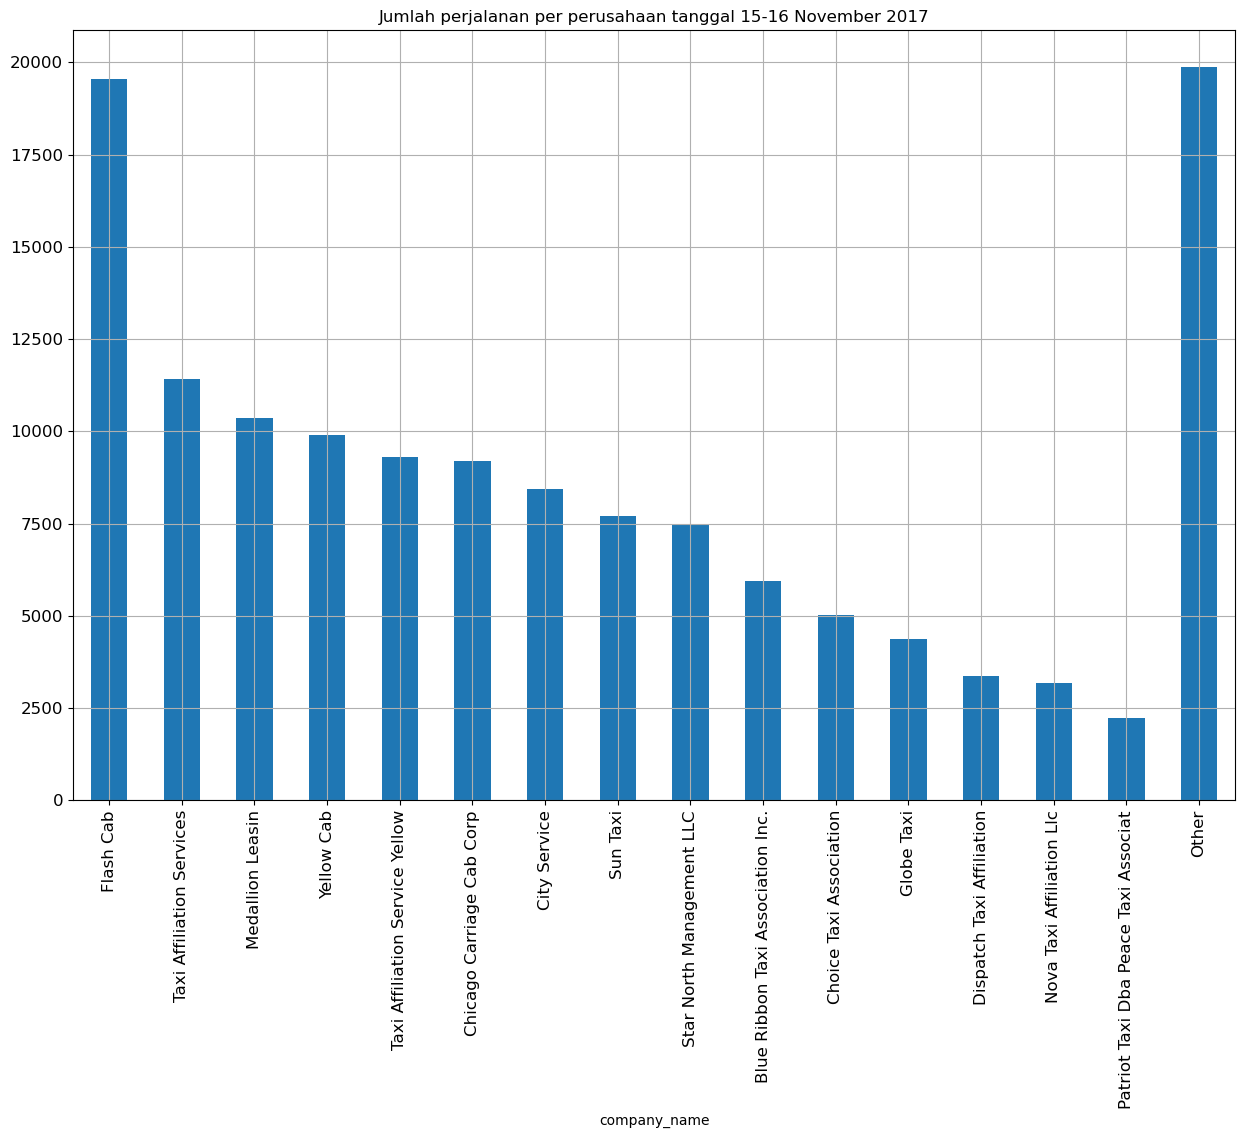

In [15]:
company_top15.plot(kind='bar',
                   x='company_name',
                   y= 'trips_amount',
                   grid=True,
                   figsize=(15,10),
                   title = 'Jumlah perjalanan per perusahaan tanggal 15-16 November 2017',
                   fontsize = 12,
                   legend = False)

plt.show()

Dari grafik dapat terlihat bahwa Flash Cab adalah perusahaan yang memiliki jumlah perjalanan terbanyak dengan total lebih dari 19000 perjalanan pada tanggal 15-16 November 2017, diikuti oleh Taxi Affiliation Services dan Medallion Leasing.

#### Grafik untuk 10 wilayah pengantaran teratas

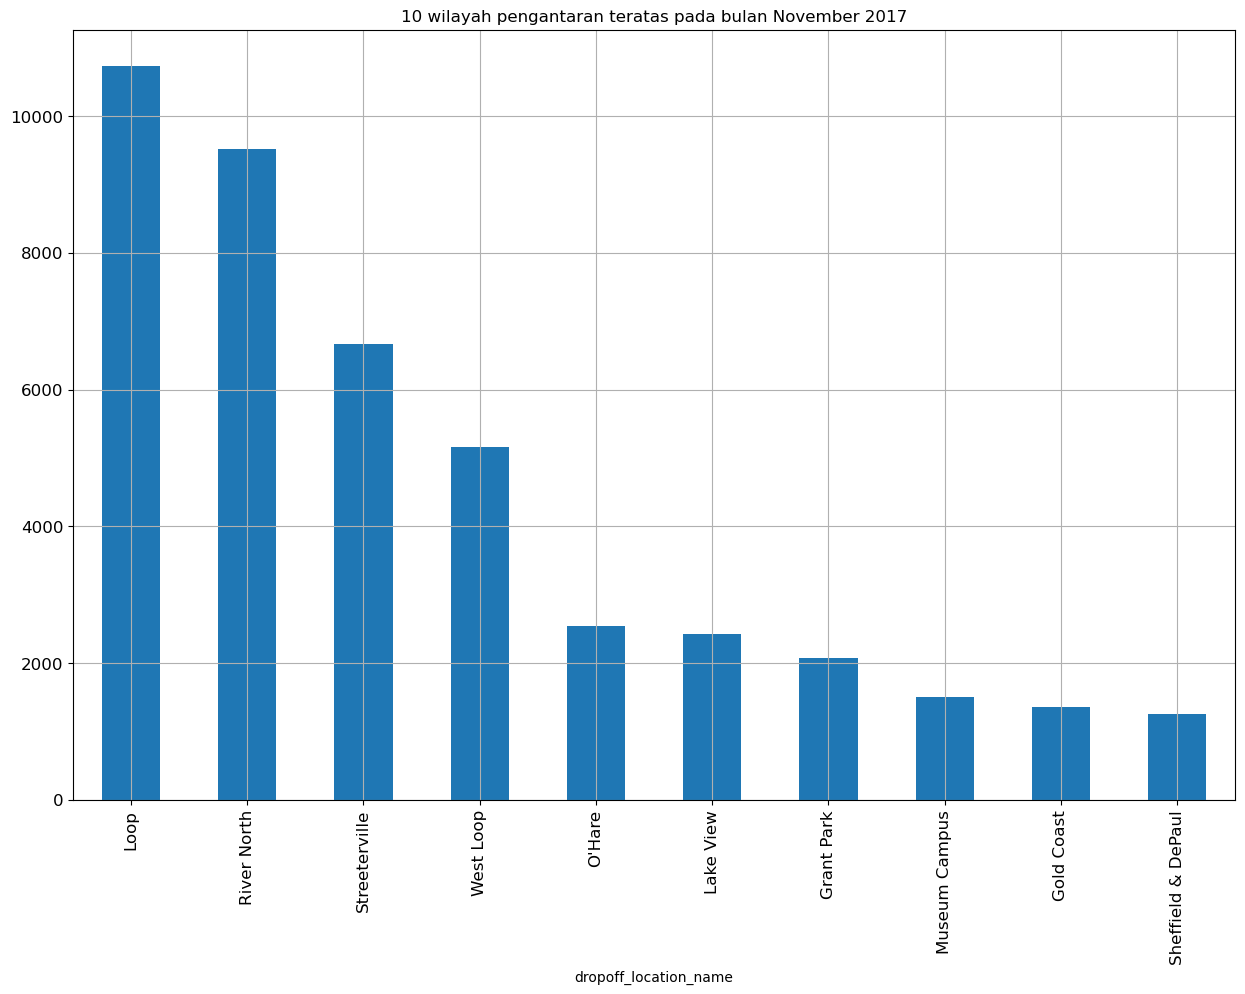

In [16]:
dropoff_top10 = dropoff.sort_values(['average_trips'], ascending=False).head(10)
dropoff_top10.plot(kind='bar',
                   x='dropoff_location_name',
                   y= 'average_trips',
                   grid=True,
                   figsize=(15,10),
                   title = '10 wilayah pengantaran teratas pada bulan November 2017',
                   fontsize = 12,
                   legend = False)

plt.show()

Dari grafik dapat terlihat bahwa Loop adalah wilayah pengantaran teratas dengan rata - rata perjalan lebih dari 10000 perjalan pada bulan November 2017, diikuti oleh River North dan Streetervile.

### Kesimpulan Sementara

Dari hasil analisa data, diperoleh data bahwa pada tanggal 16-17 November 2017, Flash Cab adalah perusahaan dengan jumlah perjalanan terbanyak, diikuti oleh Taxi Affiliation Services dan Medallion Leasing. Lalu, pada bulan November 2017, Loop adalah wilayah dengan rata - rata jumlah pengantaran terbanyak pada bulan November 2017, diikuti oleh River North dan Streeterville. Hal ini wajar mengingat [Loop adalah pusat bisnis di Chicago](https://en.wikipedia.org/wiki/Chicago_Loop)

## Pengujian hipotesis

Selanjutnya akan dilakukan pengujian hipotesis. Hipotesis yang akan diuji adalah Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan. Dari hipotesis ini, didapat hipotesis nol dan alternatifnya adalah:

- H0 (hipotesis nol): Durasi rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari - hari sabtu yang hujan dengan tidak hujan SAMA
- H1 (hipotesis alternatif) : Durasi rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari - hari sabtu yang hujan dengan tidak hujan TIDAK SAMA

Pertama akan dilakukan pemisahan data untuk cuaca yang baik dan buruk pada dataset `loop_ohare`

In [17]:
loop_ohare_good = loop_ohare[loop_ohare['weather_conditions'] == 'Good']
loop_ohare_bad = loop_ohare[loop_ohare['weather_conditions'] == 'Bad']
loop_ohare_good.shape, loop_ohare_bad.shape

((888, 3), (180, 3))

Terdapat 888 data yang memiliki cuaca yang baik dan 180 data yang memiliki cuaca tidak baik. Walau terdapat perbedaan data yang signifikan, namun kedua data memiliki lebih dari 50 data. Sehingga bisa dilakukan pengujian hipotesis.

In [18]:
loop_ohare_good.describe()

,duration_seconds
count,888.000000
mean,1999.675676
std,759.198268
min,0.000000
25%,1389.750000
50%,1800.000000
75%,2460.000000
max,7440.000000


In [19]:
loop_ohare_bad.describe()

,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


Dapat terlihat bahwa rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare pada cuaca baik adalah 2000 detik dan pada cuaca tidak baik adalah 2427 detik. Terdapat perbedaan sekitar 20%. Selanjutnya dilihat varians dari kedua data

In [20]:
print("Varians untuk data Loop ke O'Hare pada cuaca baik:", np.var(loop_ohare_good['duration_seconds']))
print("Varians untuk data Loop ke O'Hare pada cuaca baik:", np.var(loop_ohare_bad['duration_seconds']))
diff = (np.var(loop_ohare_good['duration_seconds']) - np.var(loop_ohare_bad['duration_seconds']))/np.var(loop_ohare_good['duration_seconds'])
diff_perc = '{:.2%}'.format(diff)
print('Perbedaan nilai kedua varians adalah: ',diff_perc)

Varians untuk data Loop ke O'Hare pada cuaca baik: 575732.9308497686
Varians untuk data Loop ke O'Hare pada cuaca baik: 517403.5633024689
Perbedaan nilai kedua varians adalah:  10.13%


Terdapat perbedaan nilai varians dari kedua data sebesar 10,13%. Perbedaan nilai varians ini tidak terlalu signifikan. 

In [21]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(loop_ohare_good['duration_seconds'], loop_ohare_bad['duration_seconds'],
                      equal_var=True) #penggunaan equal var yang True karena perbedaan varians yang tidak signifikan
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  6.517970327099473e-12
Kita menolak hipotesis nol


Dari hasil t-test diperoleh bahwa nilai p jauh lebih kecil dibandingkan dengan nilai batas ambang kepercayaan 0,05, Sehingga dipilih hipotesis alternatif, yakni <b>durasi rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari - hari sabtu yang hujan dengan tidak hujan TIDAK SAMA</b>.

## Kesimpulan

Dari analisa ini, diperoleh berbagai kesimpulan:
- Dari ketiga dataset, tidak ditemukan data yang memiliki nilai yang hilang maupun tipe data yang salah. Selain itu pada dataset `loop_ohare` didapatkan nilai duplikat, namun nilai ini tidak dihilangkan dikarenakan nilai duplikat ini berasal dari durasi perjalanan yang bisa memiliki nilai yang sama
- 10 wilayah Chicago teratas yang dijadikan sebagai titik pengantaran adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul pada bulan November 2017.
- Flash cab adalah perusahaan yang memiliki jumlah perjalanan terbanyak pada tanggal 15-16 November 2017, diikuti oleh axi Affiliation Services dan Medallion Leasing.
- Durasi rata - rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari - hari sabtu yang hujan dengan tidak hujan TIDAK SAMA dengan durasi rata - rata perjalanan pada hari - hari sabtu yang tidak hujan lebih cepat dibandingkan dengan durasi rata - rata perjalanan pada hari - hari sabtu yang hujan.